# Alternance Data Science OpenClassrooms
# Projet 2: Analyse de données de système éducatif

**Contexte** Academy est un startup de la EdTech. Elle cherche des marchés internationaux.

**Objectifs:**  Analyse exploratoire de la base de données EdStats de la Banque Mondiale

**inputs:** 
1. EdStatsCountry -> df_country
2. EdStatsData -> df_data
3. EdStatsSeries -> df_series
4. EdStatsFootNote -> df_foot_note
5. EdStatsCountry-Series -> df_country_series


### Import des Librairies

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## 1. Analyse exploratoire des données

### Chargement du document EdStatsCoundry-Series

Pour explorer les données je vais utiliser la méthodes .info()
la combinaison des méthodes .duplicate() et .loc(), vont me permettre d'afficher les duplicatas s'il y en a.

La méthode .info() retourne:
1. Le nombre de ligne de colonnes;
2. Le type de données contenu dans les colonnes;
3. Le nombre de valeur non nulle pour chaque colonne.


La méthode .duplicate() retourne une Series pandas de booleen. Les indexes des individus qui sont dupliquées valent "True". La méthode .loc() permet d'afficher seulement les individus dupliqués.

In [3]:
df_country_series = pd.read_csv("data/EdStatsCountry-Series.csv")
# suppression d'une colonne vide
df_country_series = df_country_series.drop(columns="Unnamed: 3")

display(df_country_series.info())

# Affichage des doublons
df_country_series.loc[df_country_series.duplicated(keep=False),:]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CountryCode  613 non-null    object
 1   SeriesCode   613 non-null    object
 2   DESCRIPTION  613 non-null    object
dtypes: object(3)
memory usage: 14.5+ KB


None

,CountryCode,SeriesCode,DESCRIPTION


**Nombre de lignes:** 613

**Nombre de colonnes:** 3

**Nombre de dupplicatas:** 0

**Valeur manquante:** non

**Explications:** Ce data frame est une table de correspondance "pays - indicateur".

### Chargement du document EdStatsCountry

J'utilise les deux mêmes méthodes que pour le documents précédents. 
J'utiliserai ces deux méthodes pour explorer tous les 3 derniers documents.

In [4]:
df_country = pd.read_csv("data/EdStatsCountry.csv")
# suppression d'une colonne vide
df_country = df_country.drop(columns="Unnamed: 31")

display(df_country.info())

# Affichage des doublons
df_country.loc[df_country['Country Code'].duplicated(keep=False),:]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 31 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

None

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data


**Nombre de lignes:** 241

**Nombre de colonnes:** 31

**Nombre de dupplicatas:** 0

**Valeur manquante:** oui

**Explications:** Ce data frame liste des informations pertinentes pour chaque pays. De nombreuses données sont manquantes. Je traiterai les données manquantes pour les colonnes pertinentes pour le projet, si cela est nécessaire.

#Nettoyage des données

In [5]:
df_data = pd.read_csv("data/EdStatsData.csv")
# suppression d'une colonne vide
df_data = df_data.drop(columns="Unnamed: 69")

display(df_data.info())

# Affichage des doublons
df_data.loc[df_data.duplicated(['Country Code', 'Indicator Code'], keep=False),:]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 69 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

None

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100


**Nombre de lignes:** 886 930

**Nombre de colonnes:** 69

**Nombre de dupplicatas:** 0

**Valeur manquante:** oui

**Explications:**
Ce dataframe, liste les scores de chaque pays pour un indicateurs donné et une année donnée.
Les données manquantes peuvent s'expliquer:
1. La banque mondiale n'a pas pu récupérer de data pour ce pays à cette date donnée
2. Pour l'année concernée, le pays n'existe pas.
3. Pour l'année concernée l'indicateur n'existe pas.

La plage d'année s'étend de 1970 à 2100. Les années 2018 et 2019 n'existent pas. A partir de 2020, les données par années sont des projections, des prédictions de l'évolution des données dans le temps. ces prédictions sont réalisées tous les 5 ans.



In [6]:
df_foot_note = pd.read_csv("data/EdStatsFootNote.csv")
# suppression d'une colonne vide
df_foot_note = df_foot_note.drop(columns="Unnamed: 4")

display(df_foot_note.info())

df_foot_note['Year'] = pd.to_numeric(df_foot_note['Year'].str[2:])

# Affichage des doublons
df_foot_note.loc[df_foot_note[['CountryCode', 'SeriesCode']].duplicated(keep=False),:]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   CountryCode  643638 non-null  object
 1   SeriesCode   643638 non-null  object
 2   Year         643638 non-null  object
 3   DESCRIPTION  643638 non-null  object
dtypes: object(4)
memory usage: 19.6+ MB


None

,CountryCode,SeriesCode,Year,DESCRIPTION
0,ABW,SE.PRE.ENRL.FE,2001,Country estimation.
1,ABW,SE.TER.TCHR.FE,2005,Country estimation.
2,ABW,SE.PRE.TCHR.FE,2000,Country estimation.
3,ABW,SE.SEC.ENRL.GC,2004,Country estimation.
4,ABW,SE.PRE.TCHR,2006,Country estimation.
...,...,...,...,...
643632,ZWE,SH.DYN.MORT,2004,Uncertainty bound is 90.7 - 107.8
643633,ZWE,SH.DYN.MORT,2007,Uncertainty bound is 91.6 - 109.3
643634,ZWE,SH.DYN.MORT,2014,Uncertainty bound is 54.3 - 76
643635,ZWE,SH.DYN.MORT,2015,Uncertainty bound is 48.3 - 73.3


**Nombre de lignes:** 643 638

**Nombre de colonnes:** 4

**Nombre de dupplicatas:** 0

**Valeur manquante:** oui

**Explications:**
 Ce dataframe, liste les indicateurs utilisés pour un pays donné et pour une année donnée.

 La variable année était de type objet. je l'ai changée pour qu'elle prennent des valeur de type numeric.

Utiliser ce dataframe doit permettre de filtrer toutes les données pertinentes du dataframe 'df_data'



In [7]:
df_series = pd.read_csv("data/EdStatsSeries.csv")
# suppression d'une colonne vide
df_series = df_series.drop(columns="Unnamed: 20")

display(df_series.info())

# Affichage des doublons
df_series.loc[df_series['Series Code'].duplicated(keep=False),:]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    

None

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type


**Nombre de lignes:** 3665

**Nombre de colonnes:** 20

**Nombre de dupplicatas:** 0

**Valeur manquante:** oui

**Explications:** Ce data frame liste des informations pertinentes pour chaque pays. De nombreuses données sont manquantes. Je traiterai les données manquantes pour les colonnes pertinentes pour le projet, si cela est nécessaire.

### Bilan première partie

Les fichiers utilisés dans la suite de ce notebook sont:\
EdStatsCountry.csv
EdstatsData.csv
EdStatsSeries.csv

Je n'utilise pas les fichiers EdStatsCountrySeries.csv et EdStatsFootNote.csv


## 2. Sélection des différents indicateurs


Les années sont réparties en 2 catégories:\
Les années passées: les indicateurs correspondent à relevés réel.\
Les années futures: les indicateurs sont des projections.

### Affichage du nombres d'indicateurs disponibles par année avec la librairie missingno.

Il y a 2 types d'indicateurs': 
1. Ceux qui correspondent à des relevés,
2. Ceux qui correspondent à des projection.

#### Sélectionner les indicateurs de relevés

<Axes: >

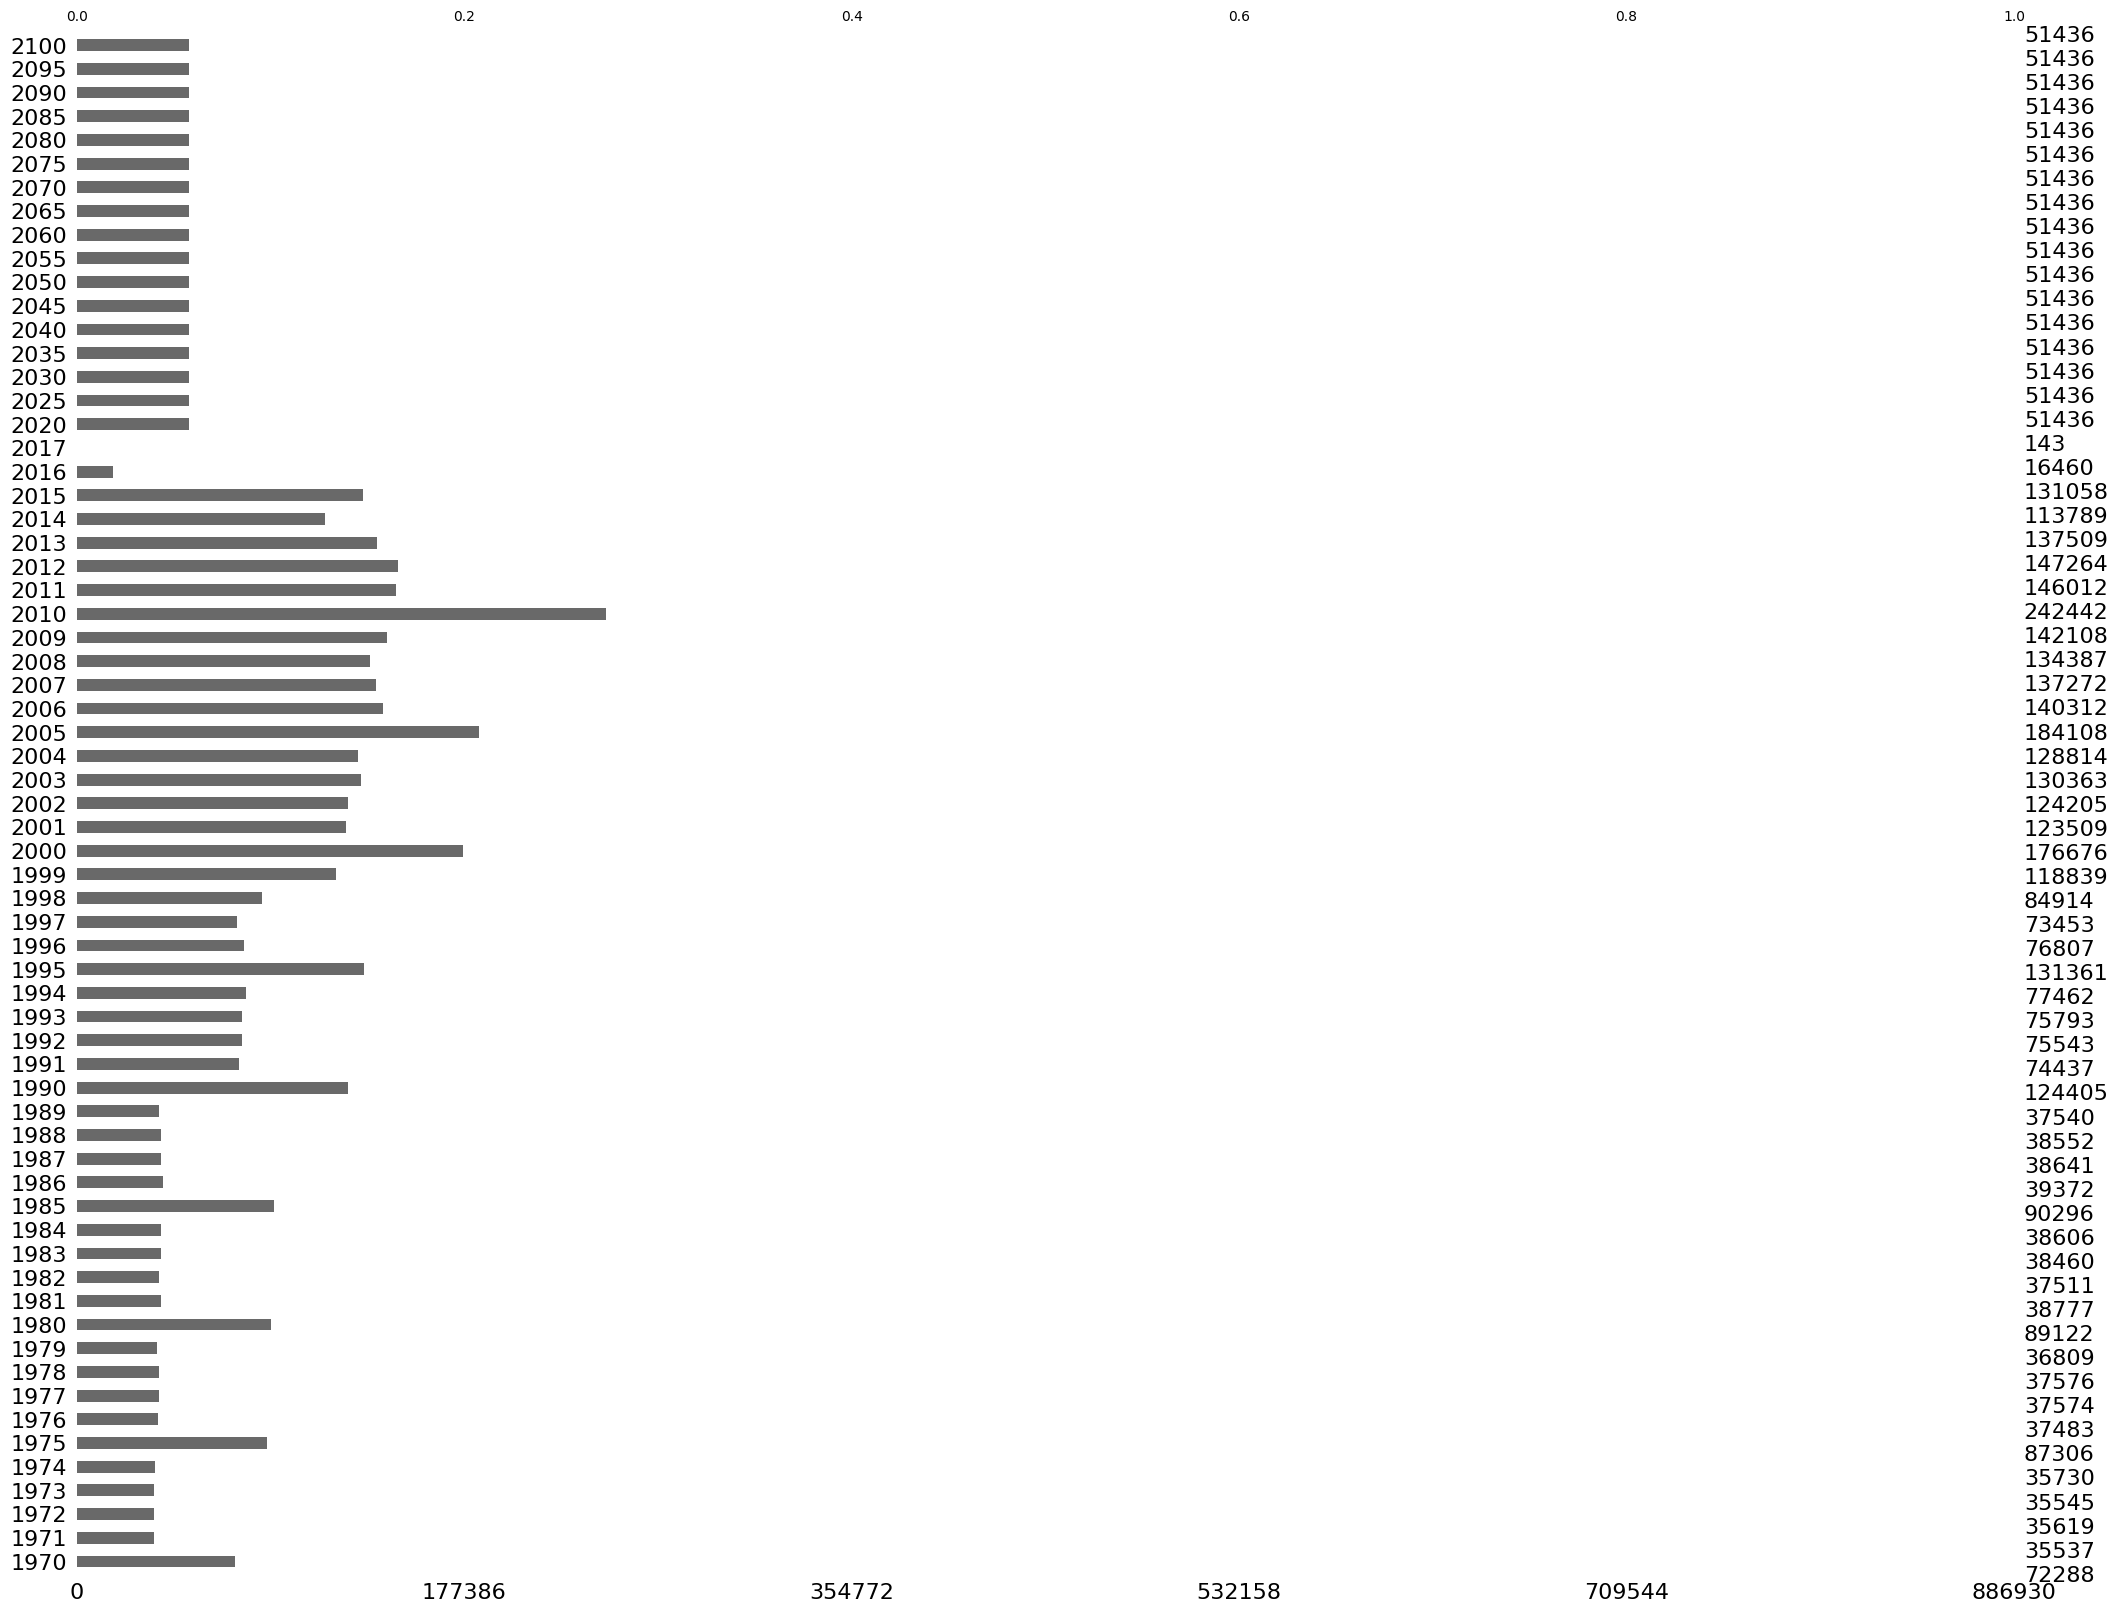

In [8]:
import missingno as msno

# Affichage des données existantes par année passée
f_list = [str(x) for x in range(1970,2018)]
p_list = [str(x) for x in range(2020, 2101, 5)]
f_list = f_list+p_list
df = df_data[f_list]

msno.bar(df,)

L'année 2010 est celle pour laquelle il existe le plus de relevé.\
Je récupère les Code indicateurs en 2010 qui ont 40% ou moins de valeurs manquantes.

In [9]:
pivot_2010 = df_data.pivot_table(index='Country Code', columns='Indicator Code', values="2010", aggfunc='sum')
pivot_2010.replace(0, np.nan, inplace=True)

missing_percentage = pivot_2010.isnull().mean()*100

columns_to_drop = missing_percentage[missing_percentage >= 40 ].index
pivot_2010_filtered_40 = pivot_2010.drop(columns=columns_to_drop)

Filtrer le dataframe qui contient les series (indicateurs) en fonction de la liste retourné dans la cellule de code précédante.\
Créer un npuveau fichier excel avec les indicateurs qui contiennent 60% ou plus de données valides.

In [10]:
list_series_filtered = list(pivot_2010_filtered_40.columns)
df_filtered = df_series.loc[df_series["Series Code"].isin(list_series_filtered)]
df_filtered.to_csv("./data/EdStatsSeriesFiltered.csv")

Indicateurs sélectionnés:
<p>
IT.NET.USER.P2 --> le pourcentage de la population ayant un accès internet,

NY.GDP.PCAP.KD --> Le PIB par habitant exprimés en dollar (selon le taux de change en vigueur en 2010),

SE.TER.ENRL --> Le nombre total d'étudiants inscrit dans des cursus du troisième cycle,

SE.SEC.ENRL --> Le nombre total d'étudiants inscrit dans des cursus du deuxième cycle.
<p>
Ces indicateurs renseigne sur la taille et la richesse des marchés potentiels.

#### Sélectionner les indicateurs de projection

D'après, les informations renseignées sur la page Education Statistics du World Bank Group, les données projetés sont réunnis dans la catégories "Attainment" pour les années 2020 à 2050.\
Je cherche dans cette catégories les indicateurs qui donne la même information que ceux que j'ai identifiés pour les indicateurs relevés.
<p>
Indicateurs sélectionnés:
<p>
PRJ.POP.2024.4.MF --> La population totale (en millier) agées de 20 à 24 inscrit dans un cursus de 3ème  cycle,

PRJ.POP.1519.3.MF --> La population totale (en millier) agées de 15 à 19 inscrit dans un cursus de 2ème  cycle.

### Formater les données
Créer un dataframe avec une colonne avec les codes pays, les années, et les indicateurs.

In [11]:
def make_pivot(df, year):
    pivot = df.pivot_table(index='Country Code', columns='Indicator Code', values=str(year), aggfunc='sum')
    pivot['Year'] = year
    # la fonction d'aggregation sum remplace NaN par 0
    pivot.replace(0, np.nan, inplace=True)
    return pivot

In [12]:
def merge_filter_df(list_pivot, cols):
    merged_pivot = pd.concat(list_pivot, ignore_index=False)

    df = merged_pivot.rename_axis(index=None, columns=None)
    df_filtered = df[cols]

    return df_filtered.sort_index()

Créer deux dataframe: un pour les années passées et un pour les années futures avec leurs indicateurs propres.

In [13]:
list_pivot=[]
for year in range(1970,2016):
    pivot = make_pivot(df_data, year)
    list_pivot.append(pivot)

list_cols = ["Year", "IT.NET.USER.P2", "NY.GDP.PCAP.KD", "SE.TER.ENRL", "SE.SEC.ENRL"]    
    
df_current = merge_filter_df(list_pivot, list_cols)    
    
list_pivot_projection=[]
for year in range(2020, 2051, 5):
    pivot = make_pivot(df_data, year)
    list_pivot_projection.append(pivot)

list_cols_projection = ["Year", "PRJ.POP.1519.3.MF", "PRJ.POP.2024.4.MF"]

df_projection = merge_filter_df(list_pivot_projection, list_cols_projection)

In [14]:
df_projection = df_projection.reset_index()
df_projection.rename(inplace=True, columns={'index': 'Country Code'})

df_current = df_current.reset_index()
df_current.rename(inplace=True, columns={'index': 'Country Code'})

In [15]:
df_projection[df_projection["Country Code"] == "USA"]

,Country Code,Year,PRJ.POP.1519.3.MF,PRJ.POP.2024.4.MF
1589,USA,2030,7106.61,5481.63
1590,USA,2035,7719.26,5214.20
1591,USA,2020,6925.74,4582.19
1592,USA,2050,9060.54,6354.98
1593,USA,2040,8261.12,5656.09
1594,USA,2025,7521.92,5042.90
1595,USA,2045,8697.72,6043.52


In [16]:
df_merged = df_projection.merge(df_current, how='outer')

Supprimer du dataframe les relevés qui correspondent à des aggrégats de pays

In [17]:
grouped_country_list = ['ARB', 'EAP', 'EAS', 'ECA', 'ECS', 'EMU', 'EUU', 'HIC', 'HPC', 'LAC', 'LCN', 'LDC', 'LIC',
 'LMC', 'LMY', 'MEA', 'MIC', 'MNA', 'NAC', 'OED', 'SAS', 'SSA', 'SSF', 'UMC', 'WLD']

df_merged = df_merged.loc[~df_merged["Country Code"].isin(grouped_country_list)]

afficher le taux de valeurs manquantes par pays

<Axes: >

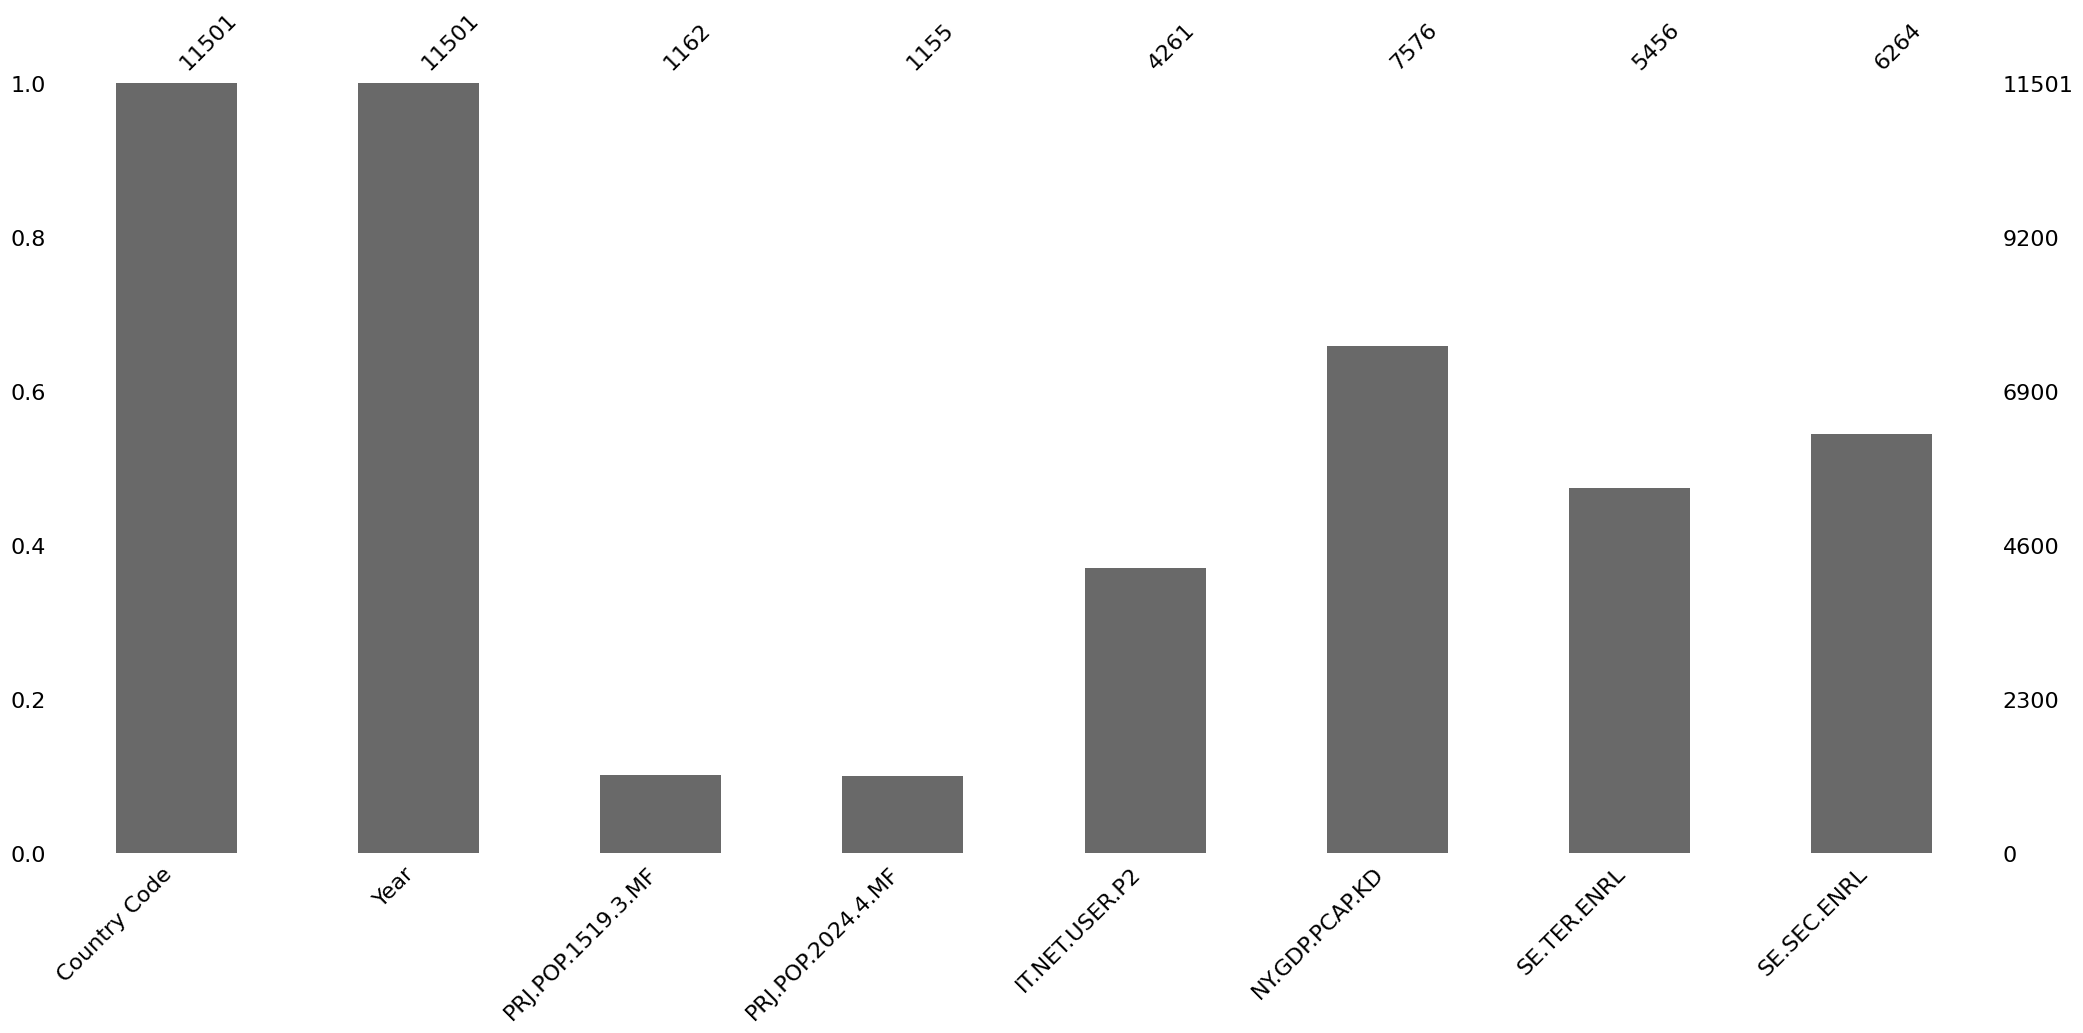

In [18]:
msno.bar(df_merged)

Remplacer les valeurs manquantes des pays par la valeur réelle de ce pays la plus proche dans le temps.\
Supprimer les valeurs manquantes restantes.

In [19]:
df_merged = df_merged.sort_values(by=["Country Code", "Year"])

# display(df_merged[df_merged["Country Code"] == "USA"])
df_merged["PRJ.POP.1519.3.MF"] = df_merged.groupby('Country Code')["PRJ.POP.1519.3.MF"].fillna(method="ffill")

df_merged["PRJ.POP.2024.4.MF"] = df_merged.groupby('Country Code')["PRJ.POP.2024.4.MF"].fillna(method="ffill")



df_merged["SE.TER.ENRL"] = df_merged.groupby('Country Code')["SE.TER.ENRL"].fillna(method="ffill")
df_merged["SE.SEC.ENRL"] = df_merged.groupby('Country Code')["SE.SEC.ENRL"].fillna(method="ffill")

# Le world wide web apparait est rendu publi en 1991. Remplacer les valeur Nan de l'accès à internet par 0.
df_merged.loc[df_merged["Year"]<1991, "IT.NET.USER.P2"] = 0
# A partir de 1991 on remplace les valeurs manquantes par la valeur correcte la plus récente
df_merged["IT.NET.USER.P2"] = df_merged.groupby('Country Code')["IT.NET.USER.P2"].fillna(method="ffill")

df_merged["NY.GDP.PCAP.KD"] = df_merged.groupby('Country Code')["NY.GDP.PCAP.KD"].fillna(method="ffill")

# display(df_merged[df_merged["Country Code"] == "USA"])

list_cols = ["SE.TER.ENRL", "SE.SEC.ENRL", "IT.NET.USER.P2", "NY.GDP.PCAP.KD", "PRJ.POP.1519.3.MF", "PRJ.POP.2024.4.MF"]

df_projection.dropna(subset=list_cols_projection, inplace=True, how='all')

C:\Users\alexi\AppData\Local\Temp\ipykernel_11820\2307440774.py:4: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  df_merged["PRJ.POP.1519.3.MF"] = df_merged.groupby('Country Code')["PRJ.POP.1519.3.MF"].fillna(method="ffill")
C:\Users\alexi\AppData\Local\Temp\ipykernel_11820\2307440774.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_merged["PRJ.POP.1519.3.MF"] = df_merged.groupby('Country Code')["PRJ.POP.1519.3.MF"].fillna(method="ffill")
C:\Users\alexi\AppData\Local\Temp\ipykernel_11820\2307440774.py:6: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Se

<Axes: >

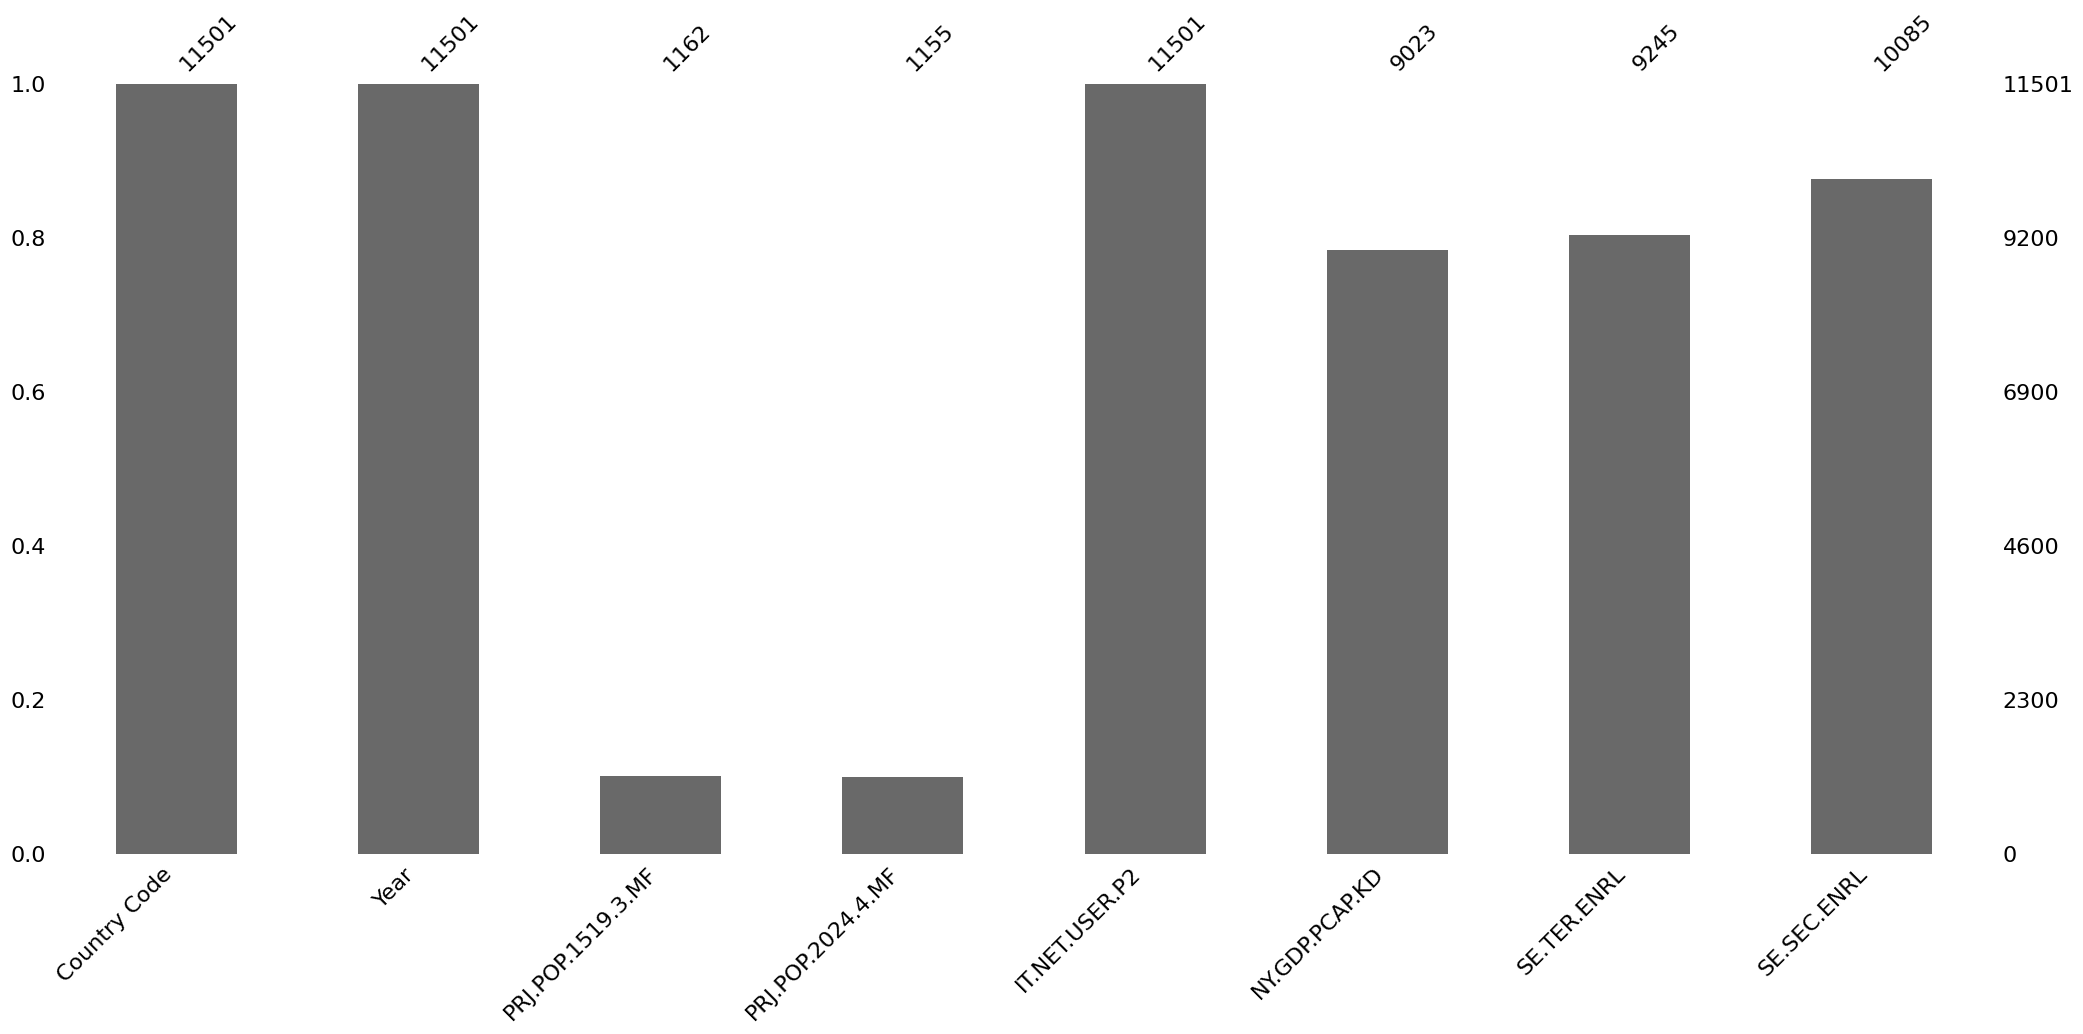

In [20]:
msno.bar(df_merged)

In [21]:
dict_short_name =dict(zip(df_country["Country Code"],df_country["Short Name"]))

df_merged["Country Name"] = df_merged["Country Code"].map(dict_short_name)

Distribution des données après traitement des valeurs manquantes

In [22]:
def better_hist(data, col):

    # Calculer les statistiques
    mean = data.mean()
    median = data.median()
    std_dev = data.std()

    # Tracer l'histogramme pour montrer la distribution
    plt.hist(data, bins=30, color='lightblue', edgecolor='black', alpha=0.7)

    # Ajouter une ligne pour la moyenne
    plt.axvline(mean, color='red', linestyle='--', linewidth=2, label=f'Moyenne: {mean:.2f}')

    # Ajouter une ligne pour la médiane
    plt.axvline(median, color='orange', linestyle='-', linewidth=2, label=f'Médiane: {median:.2f}')

    # Ajouter des lignes pour l'écart-type
    plt.axvline(mean + std_dev, color='green', linestyle=':', linewidth=2, label=f'1 Écart-type: {mean + std_dev:.2f}')
    plt.axvline(mean - std_dev, color='green', linestyle=':', linewidth=2, label=f'1 Écart-type: {mean - std_dev:.2f}')

    # Ajouter la légende
    plt.legend()

    # Ajouter le titre et les étiquettes
    plt.title(f'Distribution de la {col} avec moyenne, médiane et écart-type')
    plt.xlabel('Valeur')
    plt.ylabel('Fréquence')

    # Afficher le graphique
    plt.show()

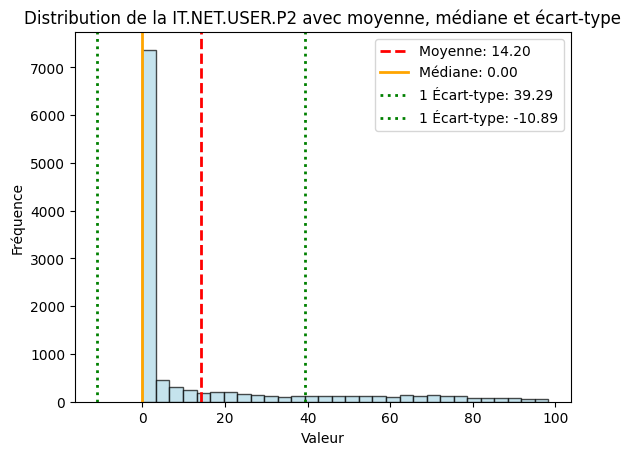

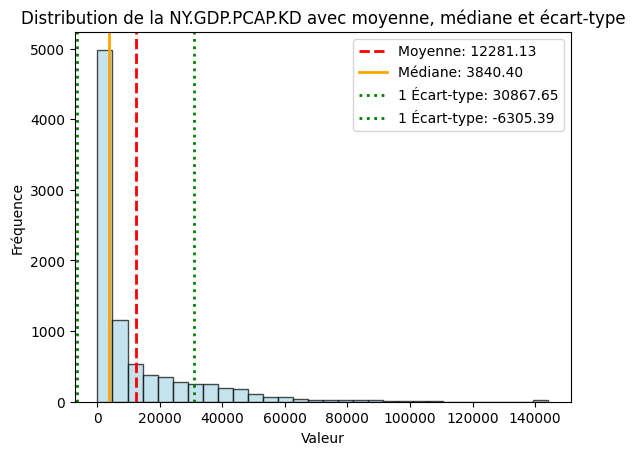

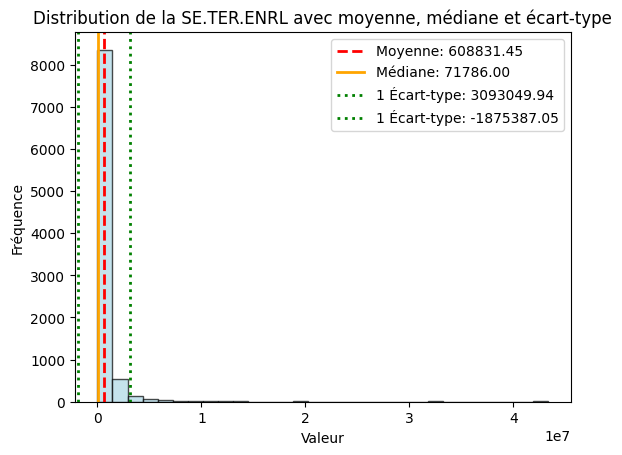

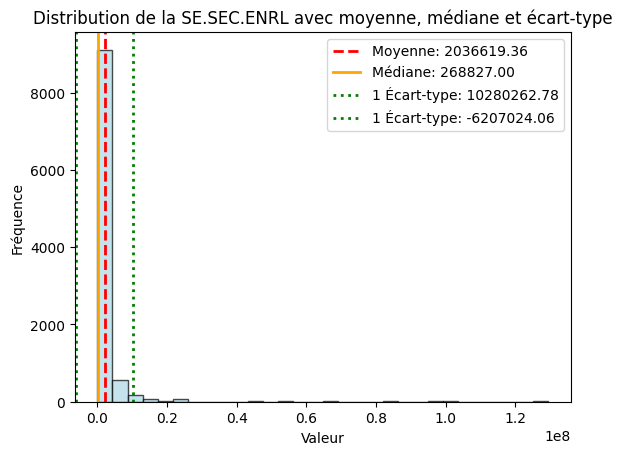

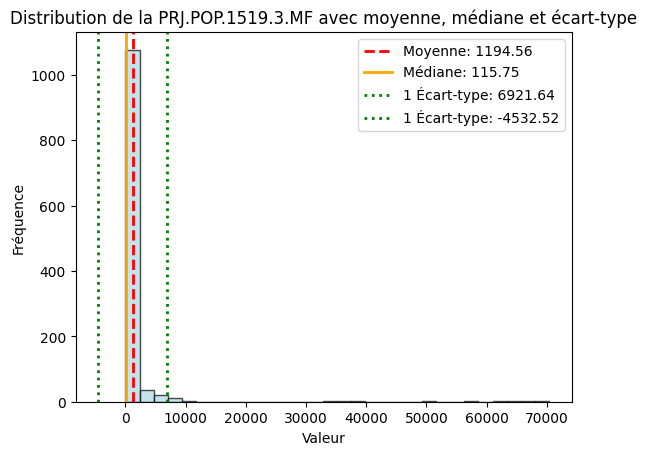

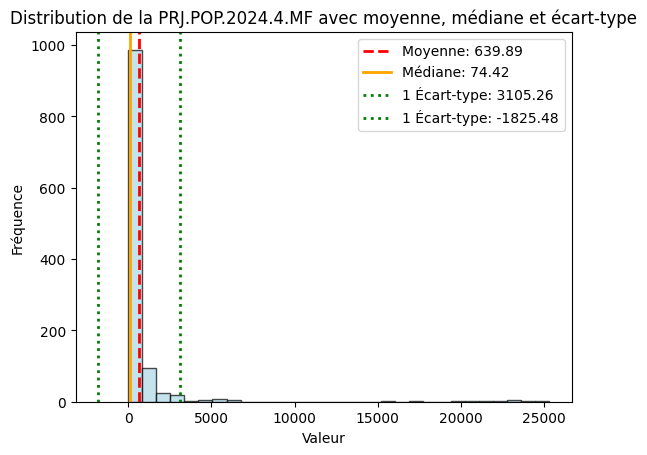

In [23]:
better_hist(df_merged["IT.NET.USER.P2"], "IT.NET.USER.P2")
better_hist(df_merged["NY.GDP.PCAP.KD"], "NY.GDP.PCAP.KD")
better_hist(df_merged["SE.TER.ENRL"], "SE.TER.ENRL")
better_hist(df_merged["SE.SEC.ENRL"], "SE.SEC.ENRL")
better_hist(df_merged["PRJ.POP.1519.3.MF"], "PRJ.POP.1519.3.MF")
better_hist(df_merged["PRJ.POP.2024.4.MF"], "PRJ.POP.2024.4.MF")

In [24]:
def better_boxplot(data, col):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1

    # Bornes pour les valeurs aberrantes
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Créer le boxplot
    plt.boxplot(data, vert=False, patch_artist=True)

    # Ajouter les lignes correspondant aux bornes inférieure et supérieure
    plt.axvline(lower_bound, color='red', linestyle='--', label=f'Borne inférieure (IQR): {lower_bound:.2f}')
    plt.axvline(upper_bound, color='blue', linestyle='--', label=f'Borne supérieure (IQR): {upper_bound:.2f}')

    # Ajouter la légende
    plt.legend()

    # Ajouter le titre et les étiquettes
    plt.title(f'Boxplot de {col} avec limites de l\'IQR')
    plt.xlabel('Valeur')

    # Afficher le graphique
    plt.show()

## 3. Calcul d'un score unique par année et pays


le score: somme totale en dollars d'un marché (population du marché * PIB par habitant)

pour les années projetés on utilise:\
"PRJ.POP.1519.3.MF" au lieu de "SE.SEC.ENRL"\
"PRJ.POP.2024.4.MF" au lieu de "SE.TER.ENRL"\

In [25]:
def calculate_score(row):
    if row["Year"] >= 2020 :
        return (row["PRJ.POP.1519.3.MF"] + row["PRJ.POP.2024.4.MF"]) * 1000 * row["IT.NET.USER.P2"] * row["NY.GDP.PCAP.KD"] / 100
    else:
        return (row["SE.SEC.ENRL"] + row["SE.TER.ENRL"]) * row["IT.NET.USER.P2"] * row["NY.GDP.PCAP.KD"] / 100
    

In [26]:
df_merged.loc[df_merged["Year"] >=1990, :].head()

,Country Code,Year,PRJ.POP.1519.3.MF,PRJ.POP.2024.4.MF,IT.NET.USER.P2,NY.GDP.PCAP.KD,SE.TER.ENRL,SE.SEC.ENRL,Country Name
20,ABW,1990,NaN,NaN,0.0,NaN,NaN,NaN,Aruba
21,ABW,1991,NaN,NaN,0.0,NaN,NaN,NaN,Aruba
22,ABW,1992,NaN,NaN,0.0,NaN,NaN,NaN,Aruba
23,ABW,1993,NaN,NaN,0.0,NaN,NaN,NaN,Aruba
24,ABW,1994,NaN,NaN,0.0,NaN,NaN,NaN,Aruba


In [27]:
df_merged = df_merged.loc[df_merged["Year"] >=1990, :]
df_merged['score'] = df_merged.apply(calculate_score, axis=1)

affichage du score (1970 à 2020) pour les 10 pays avec le meilleur score moyen sur cette même période.

In [28]:
df = df_merged.loc[df_merged["Year"] < 2020] 
df = df.groupby("Country Name")["score"].mean()
print(df.nlargest(20))
pays_eligibles = list(df.nlargest(10).index)

Country Name
United States     9.192424e+11
Japan             2.265739e+11
Germany           1.937432e+11
United Kingdom    1.450545e+11
France            1.221884e+11
China             8.989195e+10
Canada            8.878487e+10
Australia         8.095553e+10
Korea             6.875419e+10
Brazil            6.425851e+10
Italy             6.325253e+10
Netherlands       5.475214e+10
Spain             5.075319e+10
Russia            3.810425e+10
Sweden            3.361816e+10
Norway            3.121106e+10
Switzerland       2.922448e+10
Turkey            2.562050e+10
Belgium           2.443771e+10
Denmark           2.245353e+10
Name: score, dtype: float64


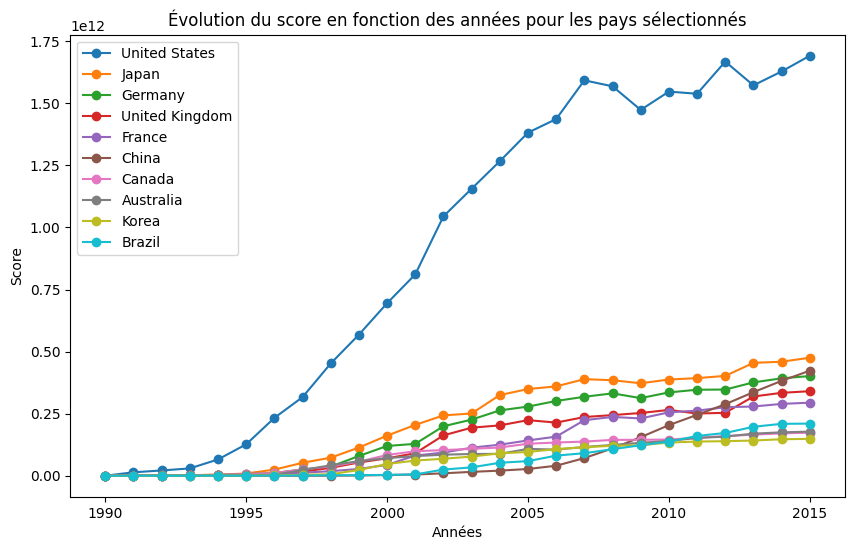

In [29]:
df_filtre = df_merged[df_merged['Country Name'].isin(pays_eligibles)]
df_filtre = df_filtre.loc[df_merged["Year"] < 2020] 

# Créer le graphique
plt.figure(figsize=(10, 6))

for pays in pays_eligibles:
    df_pays = df_filtre[df_filtre['Country Name'] == pays]
    plt.plot(df_pays['Year'], df_pays['score'], marker='o', label=pays)

# Ajouter un titre, des labels et une légende
plt.title('Évolution du score en fonction des années pour les pays sélectionnés')
plt.xlabel('Années')
plt.ylabel('Score')
plt.legend()

# Afficher le graphique
plt.show()

Affichage de la courbe des scores projetés(2020 à 2050), pour les 10 pays avec le meilleur score moyen sur cette même période.

In [30]:
df = df_merged.loc[df_merged["Year"] >= 2020] 
df = df.groupby("Country Name")["score"].mean()
print(df.nlargest(10))
pays_eligibles = list(df.nlargest(10).index)

Country Name
United States     5.173275e+11
China             1.926101e+11
Japan             1.739038e+11
France            1.306765e+11
Canada            1.202835e+11
United Kingdom    8.608985e+10
Australia         8.409520e+10
Russia            4.377126e+10
India             3.821026e+10
Germany           3.696006e+10
Name: score, dtype: float64


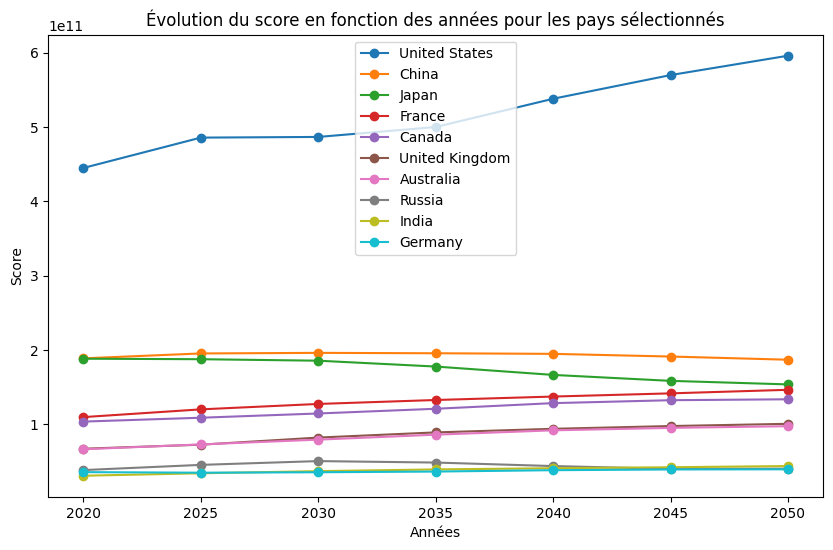

In [31]:
df_filtre = df_merged[df_merged['Country Name'].isin(pays_eligibles)]
df_filtre = df_filtre.loc[df_merged["Year"] >= 2020] 

# Créer le graphique
plt.figure(figsize=(10, 6))

for pays in pays_eligibles:
    df_pays = df_filtre[df_filtre['Country Name'] == pays]
    plt.plot(df_pays['Year'], df_pays['score'], marker='o', label=pays)

# Ajouter un titre, des labels et une légende
plt.title('Évolution du score en fonction des années pour les pays sélectionnés')
plt.xlabel('Années')
plt.ylabel('Score')
plt.legend()

# Afficher le graphique
plt.show()

In [32]:
print(df.nlargest(20))

Country Name
United States     5.173275e+11
China             1.926101e+11
Japan             1.739038e+11
France            1.306765e+11
Canada            1.202835e+11
United Kingdom    8.608985e+10
Australia         8.409520e+10
Russia            4.377126e+10
India             3.821026e+10
Germany           3.696006e+10
Spain             3.421672e+10
Brazil            3.253120e+10
Malaysia          2.697897e+10
Korea             2.678697e+10
Turkey            2.562464e+10
Mexico            2.508592e+10
Netherlands       2.491707e+10
Belgium           2.257697e+10
Italy             2.253445e+10
Israel            1.950210e+10
Name: score, dtype: float64
